# ECBM 4040 Fall '21 Project  - BIOM Group

## Initialization

In [7]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [9]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

## Get Qiita Data

In [10]:
cwd = os.getcwd()
if not os.path.exists(f"{cwd}/data/qiita/qiita_numpy.pkl"):
    !wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
    shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

## Load Qiita Dataset

In [11]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))

## Train Siamese Model using Different Embedding models

In [12]:
data = ((X_train, X_test, X_val), (y_train, y_test, y_val))
dist = DISTANCE_METRICS['EUCLIDEAN']

BATCH_SIZE = 1024
EPOCHS = 3

models = []
scores = []
histories = []

model_choices = ['CNN', 'MLP', 'LINEAR']
for model_choice in model_choices:
    print('\nBeginning to test {0} model.'.format(model_choice))
    embedding = get_embedding_model(model_choice=model_choice)
    embedding.summary()
    model, score, history = train_siamese_model(data, embedding, dist , batch_size=BATCH_SIZE, epochs=EPOCHS)
    models.append(model)
    scores.append(score)
    histories.append(history)
    print(f'Score for Siamese Model using {dist} distance: {score}')


Beginning to test CNN model.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 152)               0         
_________________________________________________________________
one_hot_encoding_layer_1 (On (None, 152, 4)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 608)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 608, 1)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 608, 4)            16        
_________________________________________________________________
batch_normalization_2 (Batch (None, 608, 4)            16        
_________________________________________________________________
average_pooling1d_2 (Ave

## Visualize Loss 

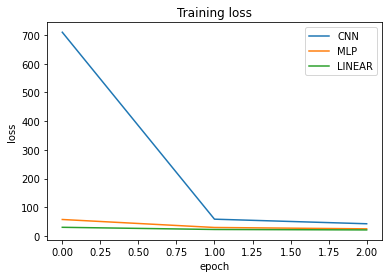

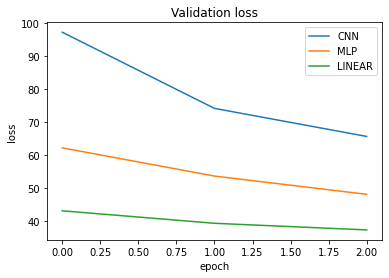

In [13]:
 
for i in range(len(model_choices)):
    history = histories[i]
    plt.plot(history.history['loss'],label=model_choices[i])
    #plt.plot(history.history['val_loss'])
    plt.title('Training loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
plt.show()

for i in range(len(model_choices)):
    history = histories[i]
    plt.plot(history.history['val_loss'],label=model_choices[i])
    #plt.plot(history.history['val_loss'])
    plt.title('Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
plt.show()

Updating Homebrew...
^C
zsh:1: command not found: tree
